In [ ]:
# Step 1: Import Required Libraries
import cirq
import numpy as np


In [ ]:
# Step 2: Create Qubits
qubit0, qubit1 = cirq.LineQubit.range(2)

In [ ]:
# Step 3: Build the Circuit
# Create the circuit
circuit = cirq.Circuit()
circuit.append([cirq.H(qubit0)])           # Put qubit0 into superposition
circuit.append([cirq.CNOT(qubit0, qubit1)])  # Entangle qubit0 and qubit1

# Add measurement
circuit.append([cirq.measure(qubit0, key='q0'), cirq.measure(qubit1, key='q1')])

print("Bell State Circuit:")
print(circuit)

Bell State Circuit:
0: ───H───@───M('q0')───
          │
1: ───────X───M('q1')───


In [ ]:
#Step 4: Simulate the Circuit Locally

# Build the circuit
circuit = cirq.Circuit()
circuit.append([cirq.H(qubit0)])
circuit.append([cirq.CNOT(qubit0, qubit1)])
circuit.append([cirq.measure(qubit0, qubit1, key='result')])

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

print("Measurement results (Bell state):")
print(result.histogram(key='result'))



Measurement results (Bell state):
Counter({0: 513, 3: 487})


Values (should match counts for 00/11): [513, 0, 0, 487]
Measurement results (Bell state):
Counter({0: 513, 3: 487})
Result object: result=101000101010011010010010111000011100010111000100000011111010100101101000101110111011111010101101100101011111010111110111111100010001110110001101001111101011111111111111101100000001101101001011110001111101010001000110010011101001001010101001101110111010100010100101000100111010011010111001000010010100111001111001010000010100001111000011010000000101111001111100101011001111010100100100000111000100100010001001000100000001011100010010000010001110110110111101010011001101000110110010010111000111110011110001000100111011001010010000101101000001110110000010110111001110111000010010010111000000001011101001001100100101000000101100001010010100110011001011010111000111010110110001110000110001000100000010100001000101111011010011000001001110010000010001000001111101100101100001111001101110001011010101010010001011110011111101010111010010000100111011010111010011110110000

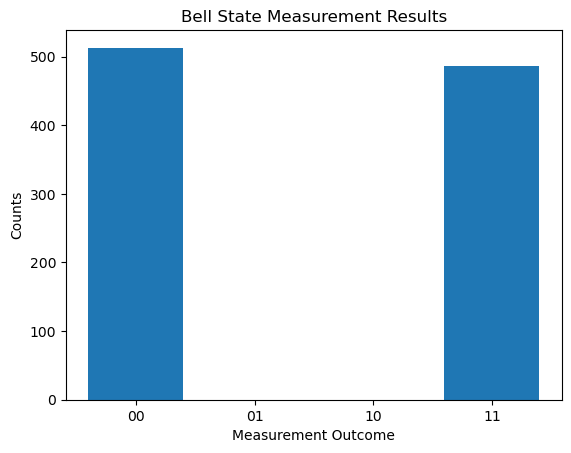

In [ ]:
# Step 5: Visualize the Results
import matplotlib.pyplot as plt

counts = result.histogram(key='result')
labels = ['00', '01', '10', '11']
int_keys = [0, 1, 2, 3]
values = [counts.get(k, 0) for k in int_keys]

print("Values (should match counts for 00/11):", values)

##debug
print("Measurement results (Bell state):")
print(result.histogram(key='result'))

print("Result object:", result)
print("Available measurement keys:", result.measurements.keys())
print("Counts:", counts)
print("Values:", values)

plt.bar(labels, values)
plt.title('Bell State Measurement Results')
plt.xlabel('Measurement Outcome')
plt.ylabel('Counts')
plt.show()


In [ ]:
#Step 6: Run on Quokka Device

# from quokka import QuokkaSimulator
# quokka_sim = QuokkaSimulator()
# result_quokka = quokka_sim.run(circuit, repetitions=1000)
# print(result_quokka.histogram(key=('q0', 'q1')))

Step 7: Explanation

How the Bell State is Created

The Hadamard gate on qubit0 puts it into a superposition: 

The CNOT gate entangles the qubits, flipping qubit1 if qubit0 is 1, producing the Bell state:

Measuring both qubits, you get either '00' or '11', but never '01' or '10'.

Result:

The histogram confirms the entanglement, as only '00' and '11' outcomes appear, each about 50% of the time.